In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_rows', 500)
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('treated_data2.csv')

In [5]:
data.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [7]:
data.head()

,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value,log_HDT,log_viscosity
0,48.150777,6.489743,6.891947,16.710984,10.066241,11.690308,122.9,56.18,2.20,7.63,25.2,4.212190,4.811371,3.226844
1,37.286173,9.935769,13.730608,15.506720,10.540729,13.000000,99.2,50.63,1.92,12.77,21.2,2.883453,4.597138,3.054001
2,44.184088,6.097359,17.529325,13.511824,6.000000,12.677404,120.2,56.28,2.12,10.54,20.8,3.228502,4.789157,3.034953
3,41.325000,6.000000,22.000000,5.000000,12.675000,13.000000,67.8,48.72,2.17,22.42,19.3,1.966387,4.216562,2.960105
4,47.279148,7.907705,11.352851,19.460296,6.000000,8.000000,131.7,63.89,2.04,9.47,15.6,4.602754,4.880527,2.747271


In [8]:
data.isnull().sum()

A                    0
B                    0
C                    0
D                    0
E                    0
F                    0
HDT_0.455©           0
UTS(Mpa)             0
Modulus(Gpa)         0
EAB%                 0
Viscosity_75C(cp)    0
R value              0
log_HDT              0
log_viscosity        0
dtype: int64

In [9]:
# Let's transform 'HDT' with a log transformation
log_UTS = np.log(data['UTS(Mpa)'])
log_modulus = np.log(data['Modulus(Gpa)'])
log_eab = np.log(data['EAB%'])
log_r = np.log(data['R value'])

# Then we add it to our data frame
data['log_UTS'] = log_UTS
data['log_modulus'] = log_modulus
data['log_eab'] = log_eab
data['log_r'] = log_r

In [12]:
data.head()

,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value,log_HDT,log_viscosity,log_UTS,log_modulus,log_eab,log_r
0,48.150777,6.489743,6.891947,16.710984,10.066241,11.690308,122.9,56.18,2.20,7.63,25.2,4.212190,4.811371,3.226844,4.028561,0.788457,2.032088,1.437983
1,37.286173,9.935769,13.730608,15.506720,10.540729,13.000000,99.2,50.63,1.92,12.77,21.2,2.883453,4.597138,3.054001,3.924544,0.652325,2.547099,1.058988
2,44.184088,6.097359,17.529325,13.511824,6.000000,12.677404,120.2,56.28,2.12,10.54,20.8,3.228502,4.789157,3.034953,4.030339,0.751416,2.355178,1.172018
3,41.325000,6.000000,22.000000,5.000000,12.675000,13.000000,67.8,48.72,2.17,22.42,19.3,1.966387,4.216562,2.960105,3.886090,0.774727,3.109953,0.676198
4,47.279148,7.907705,11.352851,19.460296,6.000000,8.000000,131.7,63.89,2.04,9.47,15.6,4.602754,4.880527,2.747271,4.157163,0.712950,2.248129,1.526655


## Creating individual models

### HDT ###

<function matplotlib.pyplot.show(close=None, block=None)>

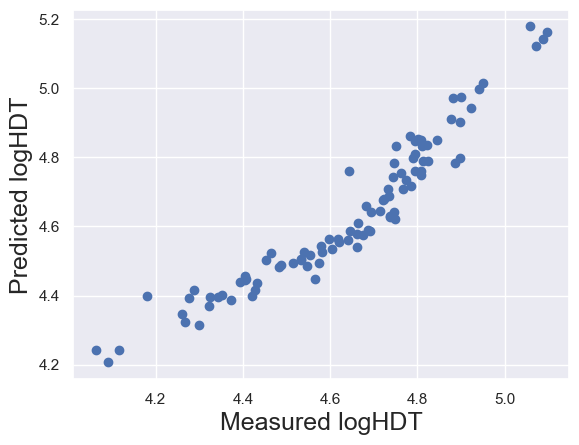

In [96]:
x_hdt = data[['B','C','D','E','F']]
y_hdt = data['log_HDT']
scaler = StandardScaler()
scaler.fit(x_hdt)
x_hdt_scaled = scaler.transform(x_hdt)
x_train_hdt,x_test_hdt,y_train_hdt,y_test_hdt = train_test_split(x_hdt_scaled,y_hdt,test_size=0.20, random_state=362)
reg_hdt = LinearRegression()
reg_hdt.fit(x_train_hdt,y_train_hdt)
yhat_hdt = reg_hdt.predict(x_train_hdt)
plt.scatter(y_train_hdt,yhat_hdt)
plt.xlabel('Measured logHDT', size=18)
plt.ylabel('Predicted logHDT', size=18)
plt.show

C:\Users\apmle\AppData\Local\Temp\ipykernel_37744\2315975641.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_hdt - yhat_hdt)


Text(0.5, 1.0, 'Residuals PDF')

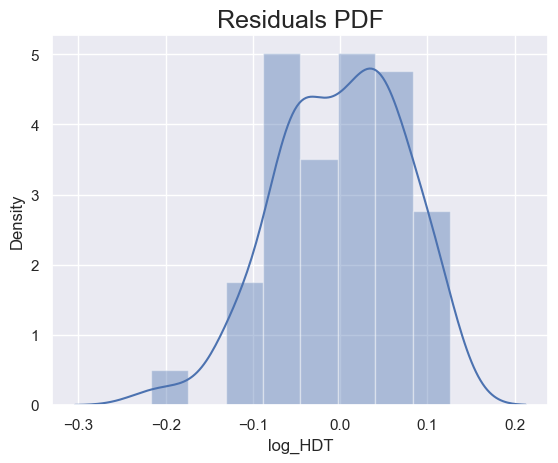

In [97]:
sns.distplot(y_train_hdt - yhat_hdt)
plt.title('Residuals PDF', size=18)

In [98]:
r2= reg_hdt.score(x_train_hdt,y_train_hdt)
r2

0.9008367103781425

In [99]:
x_hdt.shape
n = x_hdt.shape[0]
p = x_hdt.shape[1]

adjusted_r2_hdt = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2_hdt

0.8963698955303111

In [100]:
y_hat_test_hdt = reg_hdt.predict(x_test_hdt)

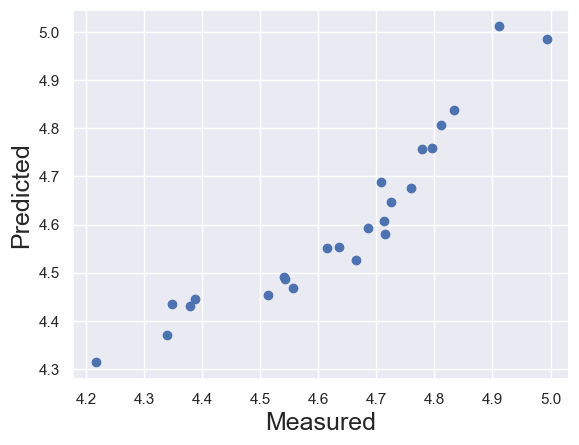

In [101]:
plt.scatter(y_test_hdt,y_hat_test_hdt)
plt.xlabel('Measured', size=18)
plt.ylabel('Predicted', size=18)
plt.show()